In [13]:
from math import pow

def analitica(m = 68.1,
          g = 9.8,
          c = 12.5,
          e = 2.72):
    
    vta = []
    for t in range(0,30,2):
        exp = (-c*t/(m))
        ex = pow(e,exp)
        res = 1 - ex
        vt = (g*m) / c * res
        vta.append(vt)

    return vta

print(analitica())

def solu_numerica(m = 68.1,
            g = 9.8,
            c = 12.5):
    time = list(range(0,30,2))
    velocidades = [0]

    for i in range(0,len(time)-1):
        new = velocidades[i] + (g-c*(velocidades[i]/m)) * (time[i+1]-time[i])
        velocidades.append(new)
    
    return velocidades

print(solu_numerica())



[0.0, 16.413559234476534, 27.781175251751662, 35.654098611651506, 41.10668621987669, 44.88301049820031, 47.49839718791519, 49.309747864551, 50.56424353306978, 51.43307550615592, 52.03480655744607, 52.45155026543902, 52.74017641790255, 52.940071591574416, 53.07851393339356]
[0, 19.6, 32.00469897209985, 39.855543695998584, 44.82428683256298, 47.96896861209199, 49.95921508342386, 51.21882775470732, 52.01602755107027, 52.52056956609587, 52.83989057707389, 53.04198654731108, 53.169891632732856, 53.250841840980705, 53.30207464531965]


In [14]:
def k1(v, 
        m = 68.1,
        g = 9.8,
        c = 12.5):

    k1_ = g-c*(v/m)
    return k1_
    

def k2(v,
        k1, 
        m = 68.1,
        g = 9.8,
        c = 12.5,
        h = 2):

    k2_ = g-c * ((v + 0.5*k1*h)/m)
    return k2_

def k3(v,
        k2,
        m = 68.1,
        g = 9.8,
        c = 12.5,
        h = 2):

    k3_ = g-c * ((v + 0.5*k2*h)/m)
    return k3_

def k4(v,
        k3,
        m = 68.1,
        g = 9.8,
        c = 12.5,
        h=2):
    
    k4_ = g-c * ((v + k3*h)/m)
    return k4_

def runge_kuta(v, 
               k1_,
               k2_,
               k3_,
               k4_,
               h = 2):
    rk_ = v + (( k1_ + (2*k2_) + (2*k3_) + k4_ ) * h)/6
    return rk_


def _main_():
    v = [0]
    time = list(range(0,30,2))
    
    for t in range(0, len(time)-1):
        k1_ = k1(v[t])
        k2_ = k2(v[t],k1_)
        k3_ = k3(v[t],k2_)
        k4_ = k4(v[t],k3_)
        #print(k1_, k2_, k3_, k4_)
        agg = runge_kuta(v[t],k1_,k2_,k3_,k4_)
        v.append(agg)

    return v

_main_()

[0,
 9.306844602985146,
 17.69301152246568,
 25.249578608460887,
 32.05861385345493,
 38.194066690695905,
 43.722571120994424,
 48.70416939036923,
 53.192964078030904,
 57.23770567669627,
 60.88232204664131,
 64.16639549362107,
 67.12559265195466,
 69.79205184151482,
 72.19473210550696]

In [15]:
from math import radians, cos, sin
import pandas as pd

a_radians = list(range(0,380,20))
#Eradians(alpha)E DE LAS X (COSENO)
#a = 20 
#Eradians(alpha)E DE LAS Y (SENO)
#b = 15

a = 20 
b = 15
X = []
Y = []
for i in a_radians:
    new_x = a * cos(radians(i))
    new_y = b * sin(radians(i))
    X.append(new_x)
    Y.append(new_y)

df = {
    "0_X" : X,
    "0_Y" : Y
}


dataframe = pd.DataFrame(df)
#print(dataframe)

columns=['30_X' , '30_Y' , '60_X' , '60_Y' , '90_X' , '90_Y' , '120_X' , '120_Y']

#0,30,60,90,120 son angulos de ...
angles = list(range(30,150,30))

for j in range(len(angles)):#30 -> 60 -> 90 -> 120 
    X_ = []
    Y_ = []
    for i in range(len(X)):
        new_x = (X[i] * cos(radians(angles[j]))) - (Y[i] * sin(radians(angles[j])))
        new_y = (Y[i] * cos(radians(angles[j]))) + (X[i] * sin(radians(angles[j])))
        X_.append(new_x)
        Y_.append(new_y)
    nombre1 = columns[j * 2]
    nombre2 = columns[(j * 2) + 1]
    dataframe[nombre1] = X_
    dataframe[nombre2] = Y_

print(dataframe)

          0_X           0_Y       30_X       30_Y       60_X       60_Y  \
0   20.000000  0.000000e+00  17.320508  10.000000  10.000000  17.320508   
1   18.793852  5.130302e+00  13.710803  13.839898   4.953954  18.841105   
2   15.320889  9.641814e+00   8.447372  16.010500  -0.689612  18.089186   
3   10.000000  1.299038e+01   2.165064  16.250000  -6.250000  15.155445   
4    3.472964  1.477212e+01  -4.378383  14.529510 -11.056546  10.393733   
5   -3.472964  1.477212e+01 -10.393733  11.056546 -14.529510   4.378383   
6  -10.000000  1.299038e+01 -15.155445   6.250000 -16.250000  -2.165064   
7  -15.320889  9.641814e+00 -18.089186   0.689612 -16.010500  -8.447372   
8  -18.793852  5.130302e+00 -18.841105  -4.953954 -13.839898 -13.710803   
9  -20.000000  1.836970e-15 -17.320508 -10.000000 -10.000000 -17.320508   
10 -18.793852 -5.130302e+00 -13.710803 -13.839898  -4.953954 -18.841105   
11 -15.320889 -9.641814e+00  -8.447372 -16.010500   0.689612 -18.089186   
12 -10.000000 -1.299038e+

[20.0, 18.79385241571817, 15.32088886237956, 10.000000000000002, 3.4729635533386083, -3.472963553338606, -9.999999999999996, -15.320888862379558, -18.793852415718167, -20.0, -18.79385241571817, -15.32088886237956, -10.000000000000009, -3.4729635533386065, 3.4729635533385994, 10.000000000000002, 15.320888862379556, 18.79385241571817, 20.0]
[17.320508075688775, 13.710802552044962, 8.447371890729723, 2.165063509461101, -4.378383483982852, -10.393732811200266, -15.155444566227672, -18.08918603602781, -18.84110470192999, -17.320508075688775, -13.710802552044962, -8.447371890729723, -2.165063509461107, 4.378383483982853, 10.393732811200259, 15.155444566227677, 18.08918603602781, 18.84110470192999, 17.320508075688778]
[10.000000000000002, 4.95395421696873, -0.6896115572065069, -6.2499999999999964, -11.056546202617342, -14.52950975595595, -16.25, -16.010500419586073, -13.839898198749445, -10.000000000000004, -4.9539542169687305, 0.6896115572065069, 6.249999999999991, 11.056546202617342, 14.529

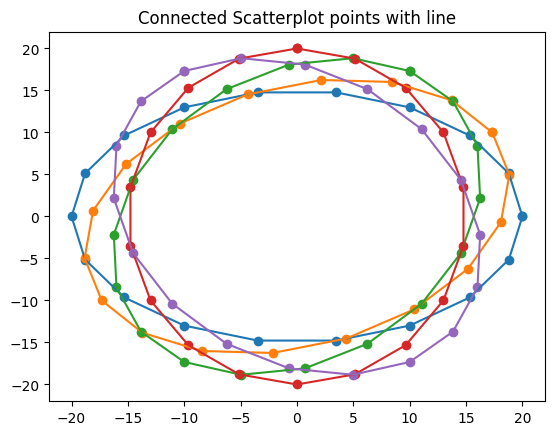

In [16]:
import matplotlib.pyplot as plt
import numpy as np

columns_ = dataframe.columns

for i in range(0,len(columns_),2):
    x = list(dataframe[columns_[i]])
    y = list(dataframe[columns_[i+1]])
    print(x)
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.title("Connected Scatterplot points with line")
    #plt.xlabel("x")
    #plt.ylabel("y")
plt.show()